In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
column_names = [
    "white_king_file", "white_king_rank",
    "white_rook_file", "white_rook_rank",
    "black_king_file", "black_king_rank",
    "white_depth_of_win"
]

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/chess/king-rook-vs-king/krkopt.data"
df = pd.read_csv(url, names=column_names)

#df.head()

In [48]:
let_to_num = {'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8}

for col in ["white_king_file", "white_rook_file", "black_king_file"]:
    df[col + "_num"] = df[col].map(let_to_num)

#df.head()

In [49]:
#Metryki:

dx = (df['white_king_file_num'] - df['black_king_file_num']).abs()
dy = (df['white_king_rank'] - df['black_king_rank']).abs()

#Euklidesowa
df['euklides'] = np.sqrt(dx**2 + dy**2)

#Manhattan
df['manhattan'] = dx + dy

#Czebyszewa
df['czybyszew'] = np.maximum(dx, dy)

#df[['euklides', 'manhattan', 'czybyszew']].head()

In [50]:
#odległość czarnego króla od krawędzi
bk_x = df['black_king_file_num']
bk_y = df['black_king_rank']

dists_to_edges = pd.concat([bk_x - 1, 8 - bk_x, bk_y - 1, 8 - bk_y], axis=1)
df['black_king_edge_dist'] = dists_to_edges.min(axis=1)

#df[['black_king_file', 'black_king_rank', 'black_king_edge_dist']].head()

In [51]:
#print(df['white_depth_of_win'].unique())

depth_mapping = {
    'draw': -1,
    'zero': 0,
    'one': 1,
    'two': 2,
    'three': 3,
    'four': 4,
    'five': 5,
    'six': 6,
    'seven': 7,
    'eight': 8,
    'nine': 9,
    'ten': 10,
    'eleven': 11,
    'twelve': 12,
    'thirteen': 13,
    'fourteen': 14,
    'fifteen': 15,
    'sixteen': 16
}


df['white_depth_of_win'] = df['white_depth_of_win'].map(depth_mapping)

#print("Unikalne wartości po naprawie:", df['white_depth_of_win'].unique())

#print(f"Liczba matów (0): {len(df[df['white_depth_of_win'] == 0])}")
#print(f"Liczba remisów (-1): {len(df[df['white_depth_of_win'] == -1])}")

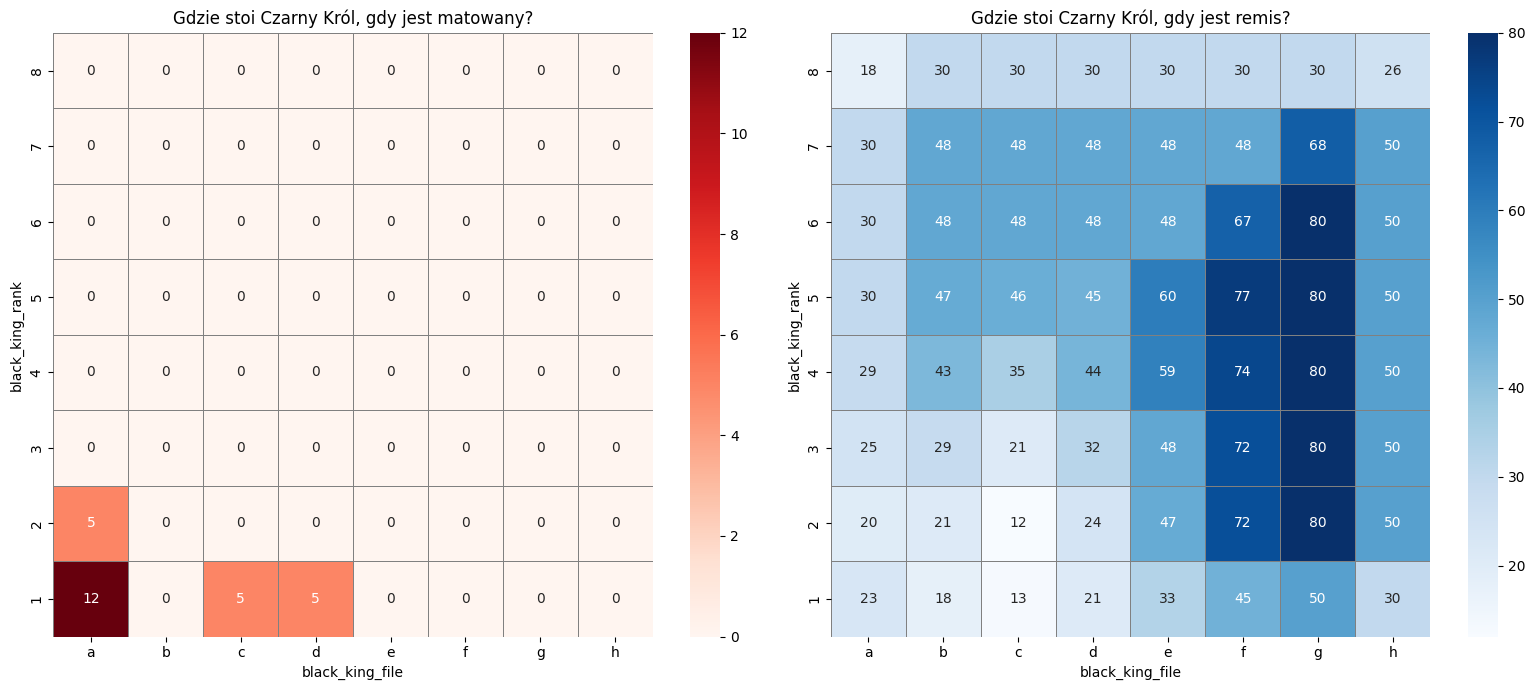

In [52]:
# Zadanie 1

kolejnosc_kolumn = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
kolejnosc_wierszy = [8, 7, 6, 5, 4, 3, 2, 1]

mat_df = df[df['white_depth_of_win'] == 0]
remis_df = df[df['white_depth_of_win'] == -1]

#print(f"Liczba sytuacji matowych: {len(mat_df)}")
#print(f"Liczba sytuacji remisowych: {len(remis_df)}")

fig, axes = plt.subplots(1, 2, figsize=(16, 7))

heatmap_mat = mat_df.pivot_table(
    index='black_king_rank', 
    columns='black_king_file', 
    values='white_depth_of_win', 
    aggfunc='count'
).fillna(0)

heatmap_mat = heatmap_mat.reindex(index=kolejnosc_wierszy, columns=kolejnosc_kolumn, fill_value=0)

sns.heatmap(heatmap_mat, annot=True, fmt='g', cmap='Reds', linewidths=.5, linecolor='gray', ax=axes[0])
axes[0].set_title('Gdzie stoi Czarny Król, gdy jest matowany?')



heatmap_remis = remis_df.pivot_table(
    index='black_king_rank', 
    columns='black_king_file', 
    values='white_depth_of_win', 
    aggfunc='count'
).fillna(0)

heatmap_remis = heatmap_remis.reindex(index=kolejnosc_wierszy, columns=kolejnosc_kolumn, fill_value=0)

sns.heatmap(heatmap_remis, annot=True, fmt='g', cmap='Blues', linewidths=.5, linecolor='gray', ax=axes[1])
axes[1].set_title('Gdzie stoi Czarny Król, gdy jest remis?')

plt.tight_layout()
plt.show()

Gdy czarny król jest matowany najczęściej stoi w narożniku.
Gdy gra kończy się remisem krój najczęściej stoi oddalony kolumnę(rząd) od brzegu, żedziej ale dalej często o 2.

C:\Users\karol\AppData\Local\Temp\ipykernel_21116\2250464081.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=x_data, y=df_clean['white_depth_of_win'], ax=axes[i], palette="viridis")
C:\Users\karol\AppData\Local\Temp\ipykernel_21116\2250464081.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=x_data, y=df_clean['white_depth_of_win'], ax=axes[i], palette="viridis")
C:\Users\karol\AppData\Local\Temp\ipykernel_21116\2250464081.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=x_data, y=df_clean['white_depth_of_win'], ax=axes[i],

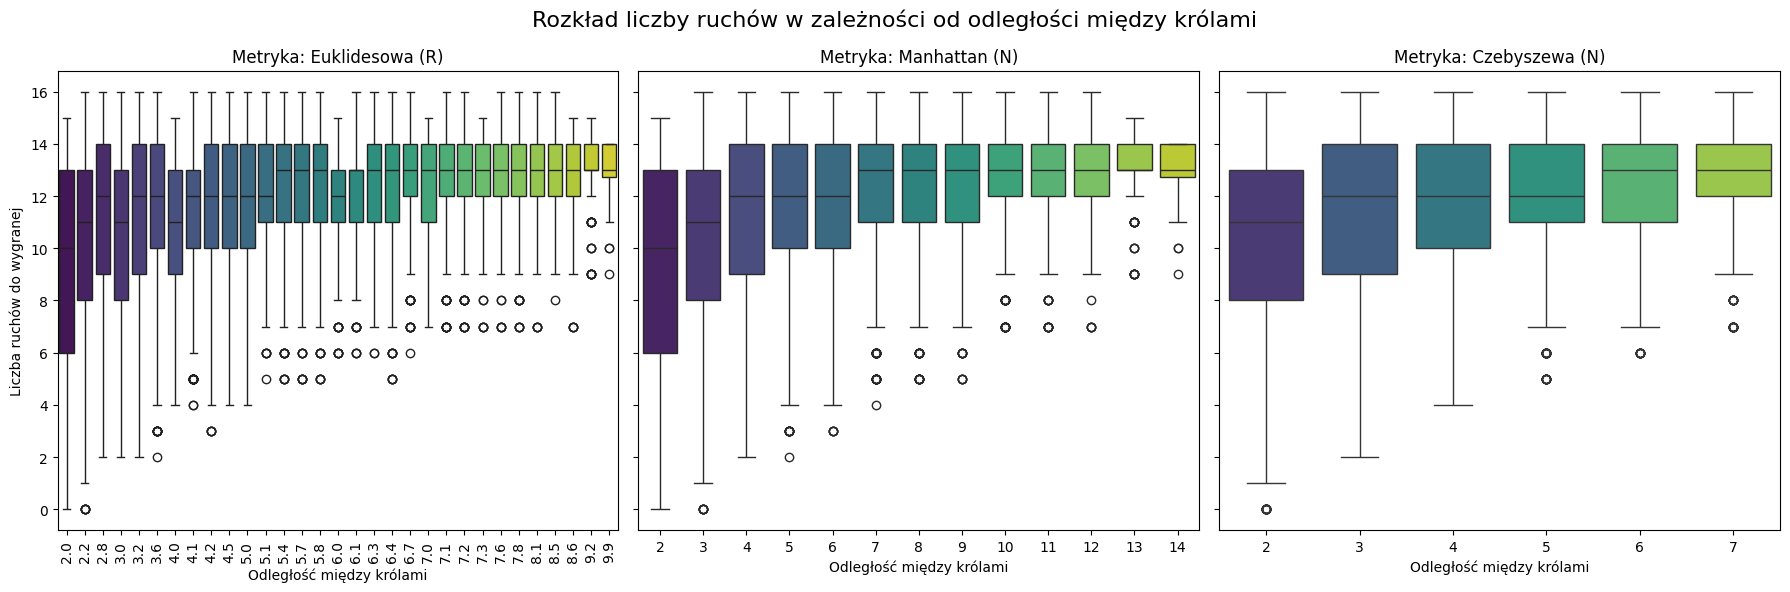

In [ ]:
# Zadanie 2
df_clean = df[df['white_depth_of_win'] != -1].copy()

correlations = df_clean[[
    'white_depth_of_win', 
    'euklides', 
    'manhattan', 
    'czybyszew'
]].corr(method='spearman')

#print(correlations['white_depth_of_win'].drop('white_depth_of_win'))
# im wieksza tym silniejszy zwiazej


fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

metrics = [
    ('euklides', 'Euklidesowa'),
    ('manhattan', 'Manhattan'),
    ('czybyszew', 'Czebyszewa')
]

for i, (col_name, title) in enumerate(metrics):
    if col_name == 'euklides':
        x_data = df_clean[col_name].round(1)
    else:
        x_data = df_clean[col_name]
        
    sns.boxplot(x=x_data, y=df_clean['white_depth_of_win'], ax=axes[i], palette="viridis")
    
    axes[i].set_title(f'Metryka: {title}')
    axes[i].set_xlabel('Odległość między królami')

    if col_name == 'euklides':
        for label in axes[i].get_xticklabels():
            label.set_rotation(90)

axes[0].set_ylabel('Liczba ruchów do wygranej')
plt.suptitle("Rozkład liczby ruchów w zależności od odległości między królami", fontsize=16)
plt.tight_layout()
plt.show()

Komentarz do polecenia 2:
W metryce euklidesowej widać, że pudełka są raz wyżej raz niżej, mediana potrafi się zarówno utrzymywać na jednym poziomie w kilku kolejnych odległościach,ale też mimo wzrostu dystansu raz niżej raz wyżej - skączą
W metryce Manhattan widać początkowo tendencje rosnącą - pudełka wyżej, póżniej tworzą się stopnie zarówno z Mediany jak i środkowych 50%.
W metryce Czebyszewa widać, że pudełka tworzą schody(nielicząc 6, ale na pewno nie obniżają się), Mediana nie ma tak dobrej tendencji wzrostowej. Jednka ze względu na pewną regularność środkowych 50% uważam, że jest najlepiej opisuje.

C:\Users\karol\AppData\Local\Temp\ipykernel_21116\2381336109.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\karol\AppData\Local\Temp\ipykernel_21116\2381336109.py:16: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplotlib `Line2D` parameters (e.g., `linewidth`, `markersize`, etc.).

  sns.pointplot(


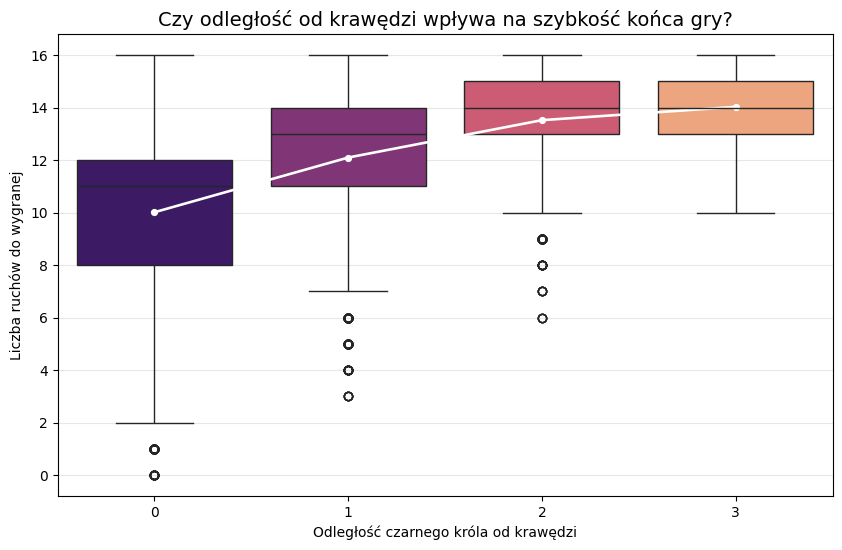

In [67]:
# Zadanie 3 - część 1
df_clean = df[df['white_depth_of_win'] != -1]
plt.figure(figsize=(10, 6))

sns.boxplot(
    data=df_clean,
    x='black_king_edge_dist',
    y='white_depth_of_win',
    palette="magma"
)
plt.title("Czy odległość od krawędzi wpływa na szybkość końca gry?", fontsize=14)
plt.xlabel("Odległość czarnego króla od krawędzi")
#0 to jest w skrajnym wierszu/kolumnie
plt.ylabel("Liczba ruchów do wygranej")

sns.pointplot(
    data=df_clean,
    x='black_king_edge_dist', 
    y='white_depth_of_win',
    estimator='mean',
    color='white',
    markers='o',
    scale=0.7,
    errorbar=None
)

plt.grid(axis='y', alpha=0.3)
plt.show()

Zdecydowanie widać tu zależność - im bliżej czarny król krawędzi planszy tym zazwyczaj szybciej kończy się gra. Tendencję rosnącą widać patrząc na pudełka, ale tam przy odległości 2 i 3 są na tej samej wysokości. Dlatego dodałam białe kropki - średnie dla każdej odległości - widać, że wykres(ich połączenie) jest roznący.

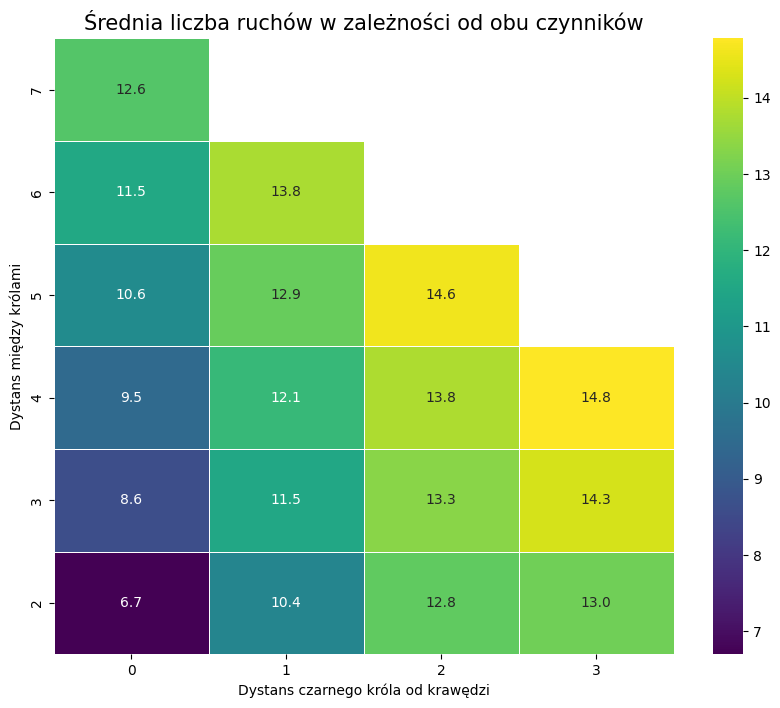

In [69]:
# Zadanie 3 - część 1
df_clean = df[df['white_depth_of_win'] != -1]

grupy = df_clean.groupby(['czybyszew', 'black_king_edge_dist'])['white_depth_of_win'].mean()
heatmap_data = grupy.unstack()
heatmap_data = heatmap_data.sort_index(ascending=False)


plt.figure(figsize=(10, 8))

sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".1f",
    cmap="viridis",
    linewidths=.5
)

plt.title("Średnia liczba ruchów w zależności od obu czynników", fontsize=15)
plt.xlabel("Dystans czarnego króla od krawędzi")
plt.ylabel("Dystans między królami")

plt.show()

Kolor to średnia liczba ruchow które musi wykonać biały aby zakończyć grę. 
Na osi X dystans od czarnego króla, na osi Y dystans miedzy królami. Wyrażnie widać, że uzupełnienie o odległość miedzy królami może dodatkowo pomóc, ponieważ liczby zmieniają się w pojedynczej kolumnie - dla tego samego dystansu króla od krawędzi wartości rozną wraz ze wzrostem dystansu między królami. Liczby (kolory)zmieniają zarówno góra-dół jak i na boki.